In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Owner\anaconda3\envs\python_new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


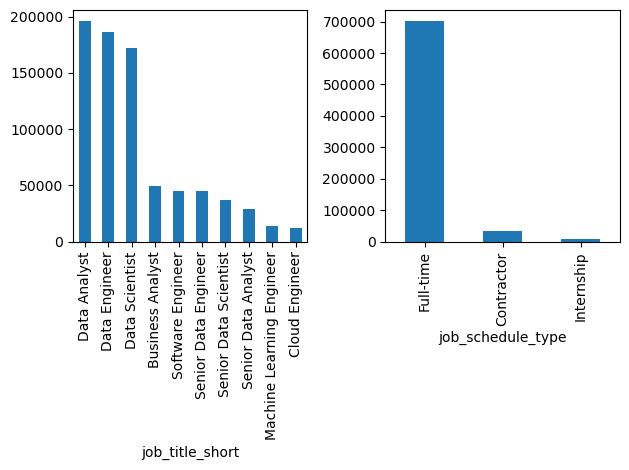

In [7]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind = "bar" ,ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind ="bar", ax = ax[1])

#fix the tight layout 
fig.tight_layout()

plt.show()

### Create an individual bar chart for each job title short



In [8]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [10]:
# Get the top 3 titles
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3]
job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

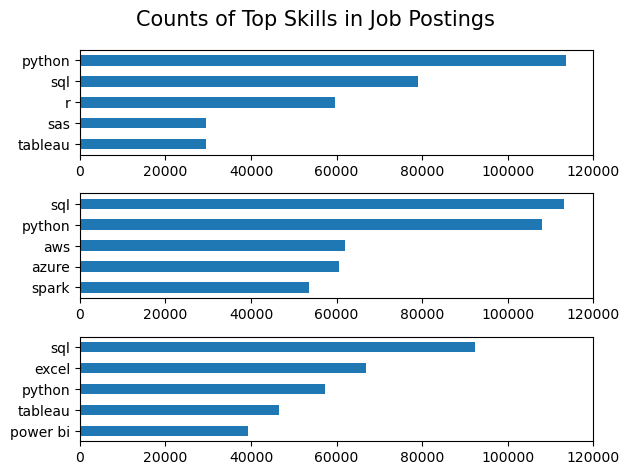

In [26]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(5).plot(kind="barh", x="job_skills",y="skill_count", ax = ax[i])
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 120000) # make the scales the same

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() # fix the overlap
#plt.show()


# Save the figure in the file path of your choice
plt.savefig(r'C:\\Users\\Owner\\Desktop\\Desktop\\Python_practice\\python_ex1\\top_skills.jpg')

plt.show()